In [1]:
# Name - Devendra jangir

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42) 


In [2]:
# Step 1: Base Features
data = {
    'CustomerID': range(1, 5001),
    'Age': np.random.randint(18, 70, size=5000),
    'Gender': np.random.choice(['Male', 'Female'], size=5000),
    'ContractType': np.random.choice(['Month-to-month', 'One year', 'Two year'], size=5000),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], size=5000),
    'TechSupport': np.random.choice(['Yes', 'No'], size=5000),
    'PaperlessBilling': np.random.choice(['Yes', 'No'], size=5000)
}


In [3]:
# Step 2: Realistic MonthlyCharges
monthly_charges = []
for service in data['InternetService']:
    if service == 'DSL':
        monthly_charges.append(np.random.normal(loc=40, scale=10))  # DSL charges
    elif service == 'Fiber optic':
        monthly_charges.append(np.random.normal(loc=90, scale=15))  # Fiber optic charges
    else:  # No internet
        monthly_charges.append(np.random.normal(loc=20, scale=5))   # No internet

data['MonthlyCharges'] = monthly_charges

In [4]:
# Step 3: Generate Tenure based on ContractType
tenure = []
for contract in data['ContractType']:
    if contract == 'Month-to-month':
        tenure.append(np.random.randint(1, 12))  # Shorter tenure
    elif contract == 'One year':
        tenure.append(np.random.randint(12, 24))  # 1 year contract
    else:
        tenure.append(np.random.randint(24, 72))  # 2 year contract

data['Tenure'] = tenure

In [5]:
# Step 4: Adjust MonthlyCharges based on Tenure (correlation)
data['MonthlyCharges'] = [charge - (0.1 * tenure) for charge, tenure in zip(data['MonthlyCharges'], data['Tenure'])]

In [6]:
# Step 5: Generate TotalCharges based on MonthlyCharges and Tenure, with some noise
total_charges = []
for i in range(5000):
    base_charge = data['MonthlyCharges'][i] * data['Tenure'][i]
    noise = np.random.uniform(-100, 100)
    total_charges.append(base_charge + noise if base_charge > 0 else 0)

data['TotalCharges'] = total_charges

In [7]:
# Step 6: PaymentMethod based on ContractType and PaperlessBilling
payment_method = []
for i in range(5000):
    if data['ContractType'][i] == 'Month-to-month':
        payment_method.append(np.random.choice(['Electronic check', 'Credit card', 'Debit card']))
    else:
        payment_method.append(np.random.choice(['Bank transfer', 'Direct debit', 'Credit card']))

data['PaymentMethod'] = payment_method

In [8]:
# Step 7: Adjust Churn based on contract type and other features
churn = []
for i in range(5000):
    if data['ContractType'][i] == 'Month-to-month' or data['TechSupport'][i] == 'No' or data['MonthlyCharges'][i] > 80:
        churn.append(np.random.choice(['Yes', 'No'], p=[0.4, 0.6]))  # Higher chance of churn
    else:
        churn.append(np.random.choice(['Yes', 'No'], p=[0.1, 0.9]))  # Lower chance of churn

data['Churn'] = churn

In [9]:
# Derived feature: Average Monthly Charges (over tenure)
data['AverageMonthlyCharges'] = [total / tenure if tenure > 0 else 0 
                                 for total, tenure in zip(data['TotalCharges'], data['Tenure'])]

#  a factor for future projected value (e.g., between 1.2 and 1.5 times the charges)
future_value_factor = np.random.uniform(1.2, 1.5, size=5000)

# Updating Customer Lifetime Value with future value factor
data['CustomerLifetimeValue'] = [avg * tenure * factor if tenure > 0 else 0 
                                 for avg, tenure, factor in zip(data['AverageMonthlyCharges'], data['Tenure'], future_value_factor)]


In [10]:
# Step 9: Create DataFrame
df = pd.DataFrame(data)

In [11]:
df.head()

,CustomerID,Age,Gender,ContractType,InternetService,TechSupport,PaperlessBilling,MonthlyCharges,Tenure,TotalCharges,PaymentMethod,Churn,AverageMonthlyCharges,CustomerLifetimeValue
0,1,56,Male,One year,Fiber optic,No,No,100.682961,16,1574.666543,Direct debit,No,98.416659,2121.611374
1,2,69,Female,Month-to-month,Fiber optic,No,No,100.747391,11,1023.870600,Credit card,Yes,93.079145,1319.911177
2,3,46,Female,Month-to-month,DSL,Yes,Yes,54.050081,1,110.331266,Debit card,No,110.331266,154.901818
3,4,32,Male,Two year,DSL,Yes,Yes,30.661241,31,1035.495034,Bank transfer,Yes,33.403066,1277.153518
4,5,60,Male,One year,Fiber optic,No,Yes,100.699546,18,1825.154948,Direct debit,Yes,101.397497,2671.917754


In [12]:
# Step 10: Add outliers
outlier_indices = np.random.choice(df.index, size=int(0.01 * len(df)), replace=False)
df.loc[outlier_indices, 'MonthlyCharges'] = df['MonthlyCharges'] * 3
df.loc[outlier_indices, 'TotalCharges'] = df['TotalCharges'] * 4


In [13]:
# Check the first few rows
df.head()

,CustomerID,Age,Gender,ContractType,InternetService,TechSupport,PaperlessBilling,MonthlyCharges,Tenure,TotalCharges,PaymentMethod,Churn,AverageMonthlyCharges,CustomerLifetimeValue
0,1,56,Male,One year,Fiber optic,No,No,100.682961,16,1574.666543,Direct debit,No,98.416659,2121.611374
1,2,69,Female,Month-to-month,Fiber optic,No,No,100.747391,11,1023.870600,Credit card,Yes,93.079145,1319.911177
2,3,46,Female,Month-to-month,DSL,Yes,Yes,54.050081,1,110.331266,Debit card,No,110.331266,154.901818
3,4,32,Male,Two year,DSL,Yes,Yes,30.661241,31,1035.495034,Bank transfer,Yes,33.403066,1277.153518
4,5,60,Male,One year,Fiber optic,No,Yes,100.699546,18,1825.154948,Direct debit,Yes,101.397497,2671.917754


In [14]:
# 2. Exploratory Data Analysis (EDA):
#   Perform in-depth EDA to understand the dataset characteristics.
#   Calculate summary statistics for numerical columns.
#   Analyze categorical data distributions.
#   Visualize relationships between features and the target variable (churn).
#   Identify potential correlations and patterns

In [15]:
# Summary statistics for numerical columns
summary_stats = df.describe()
summary_stats


,CustomerID,Age,MonthlyCharges,Tenure,TotalCharges,AverageMonthlyCharges,CustomerLifetimeValue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,43.584600,49.222352,23.551400,1131.924842,48.240693,1486.829413
std,1443.520003,14.919094,34.051063,19.304111,1423.152553,33.809915,1742.736481
min,1.000000,18.000000,-3.104806,1.000000,-78.021824,-78.021824,-113.239497
25%,1250.750000,31.000000,20.859270,9.000000,283.162777,20.561091,377.879425
50%,2500.500000,43.000000,38.967557,17.000000,634.970220,38.763107,856.127841
75%,3750.250000,56.000000,78.437933,35.000000,1411.865559,77.747826,1892.530111
max,5000.000000,69.000000,350.063462,71.000000,29711.203892,200.075040,11371.760359


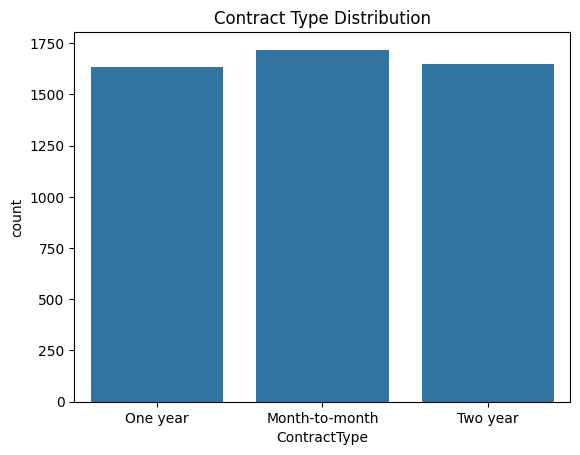

In [16]:

# Count plot for ContractType
sns.countplot(x='ContractType', data=df)
plt.title('Contract Type Distribution')
plt.show()


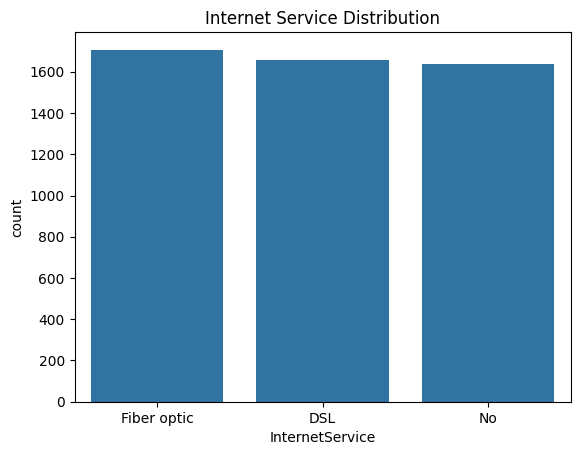

In [17]:
# Count plot for InternetService
sns.countplot(x='InternetService', data=df)
plt.title('Internet Service Distribution')
plt.show()

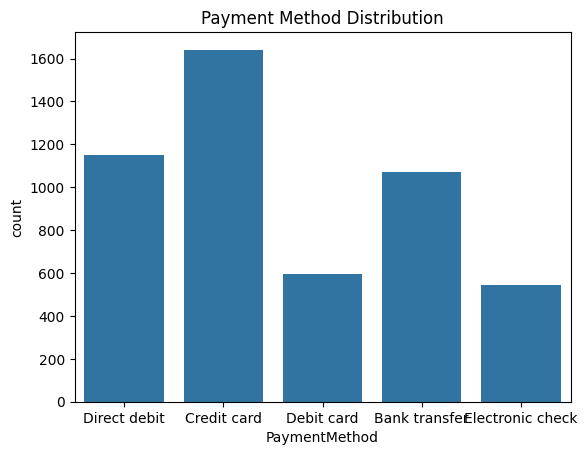

In [18]:
# Count plot for PaymentMethod
sns.countplot(x='PaymentMethod', data=df)
plt.title('Payment Method Distribution')
plt.show()

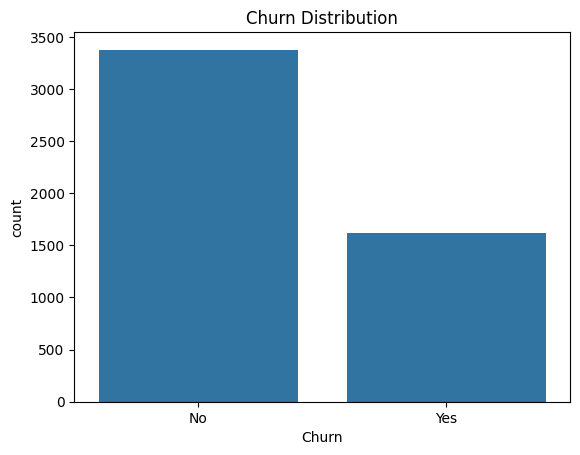

In [19]:
# Count plot for Churn
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

In [20]:
# Visualizing Relationships Between Features and Churn

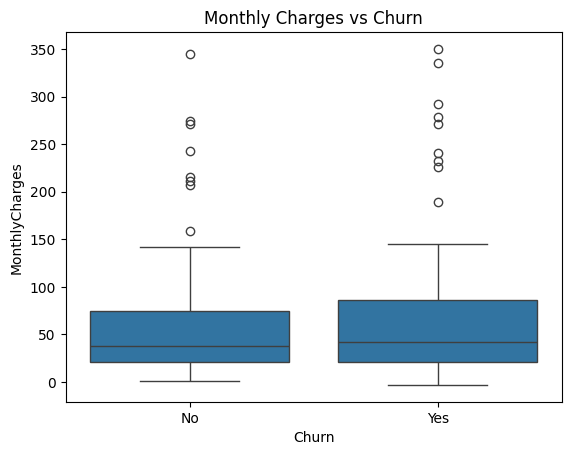

In [21]:
# Boxplot for MonthlyCharges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

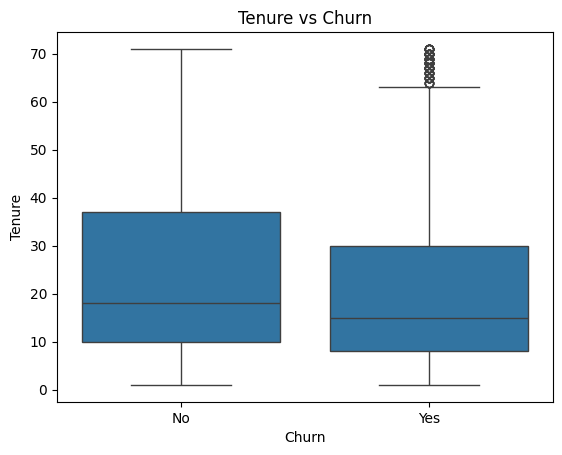

In [22]:
# Boxplot for Tenure vs Churn
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

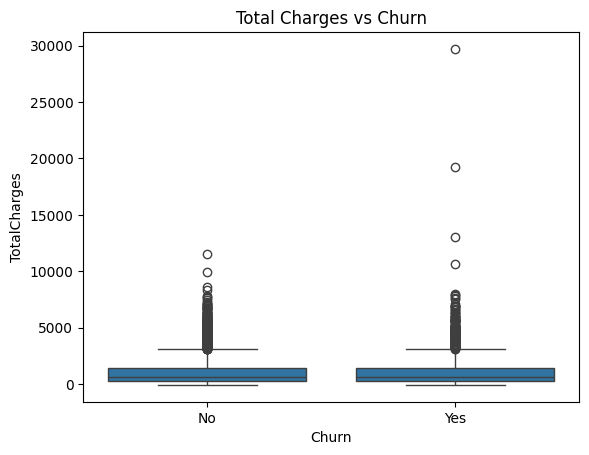

In [23]:
# Boxplot for TotalCharges vs Churn
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges vs Churn')
plt.show()

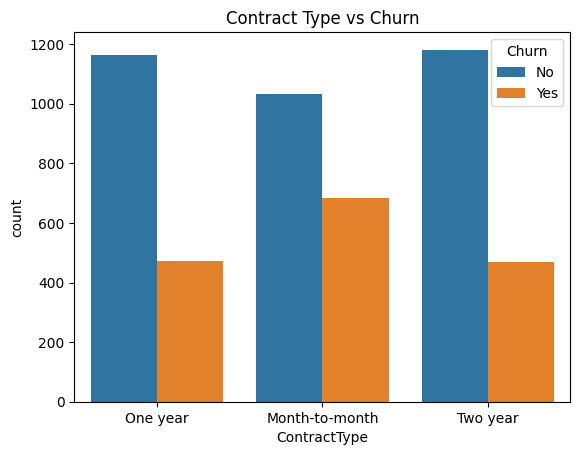

In [24]:
# Count plot for ContractType vs Churn
sns.countplot(x='ContractType', hue='Churn', data=df)
plt.title('Contract Type vs Churn')
plt.show()

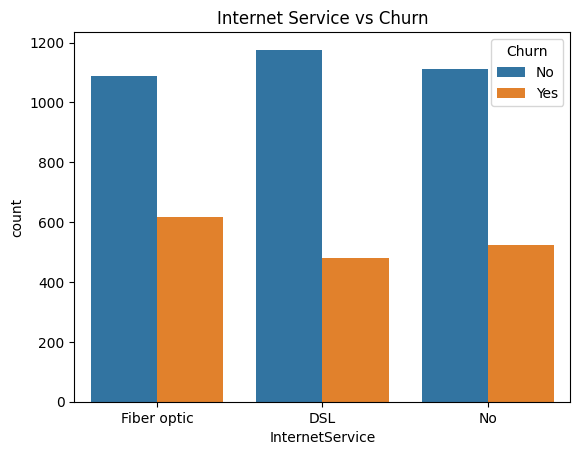

In [25]:
# Count plot for InternetService vs Churn
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Internet Service vs Churn')
plt.show()


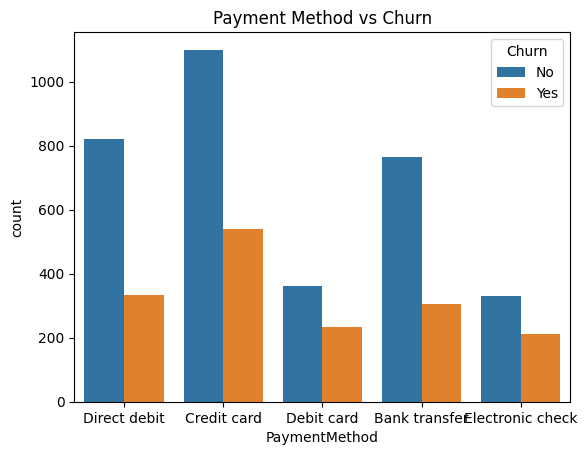

In [26]:
# Count plot for PaymentMethod vs Churn
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Payment Method vs Churn')
plt.show()

In [27]:
# Correlation Heatmap:
# To identify potential correlations between numerical features and churn, you can create a correlation heatmap. This shows how strongly numerical 
# features are correlated with one another and with churn.

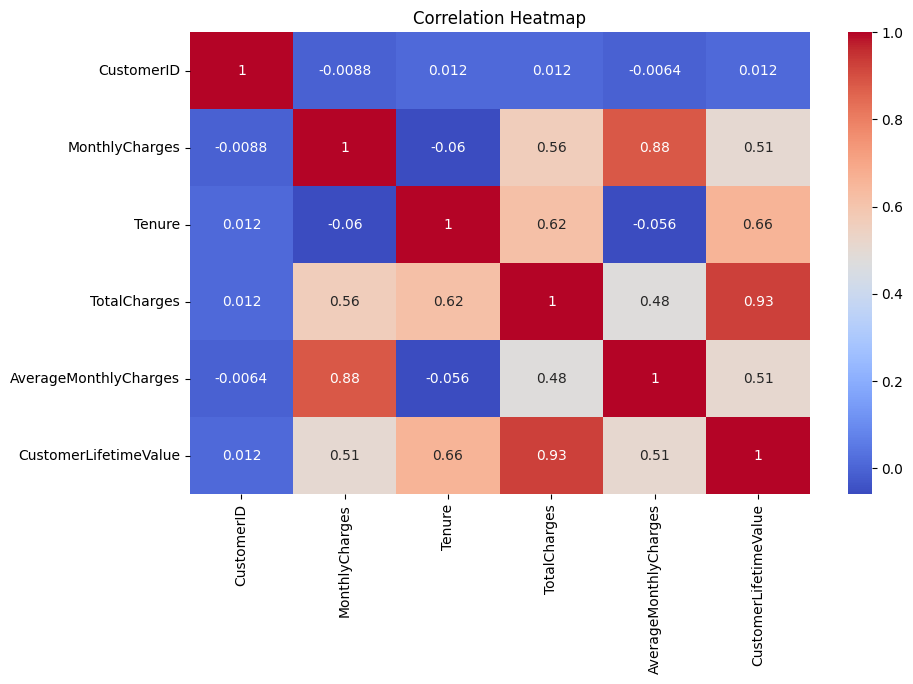

In [28]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


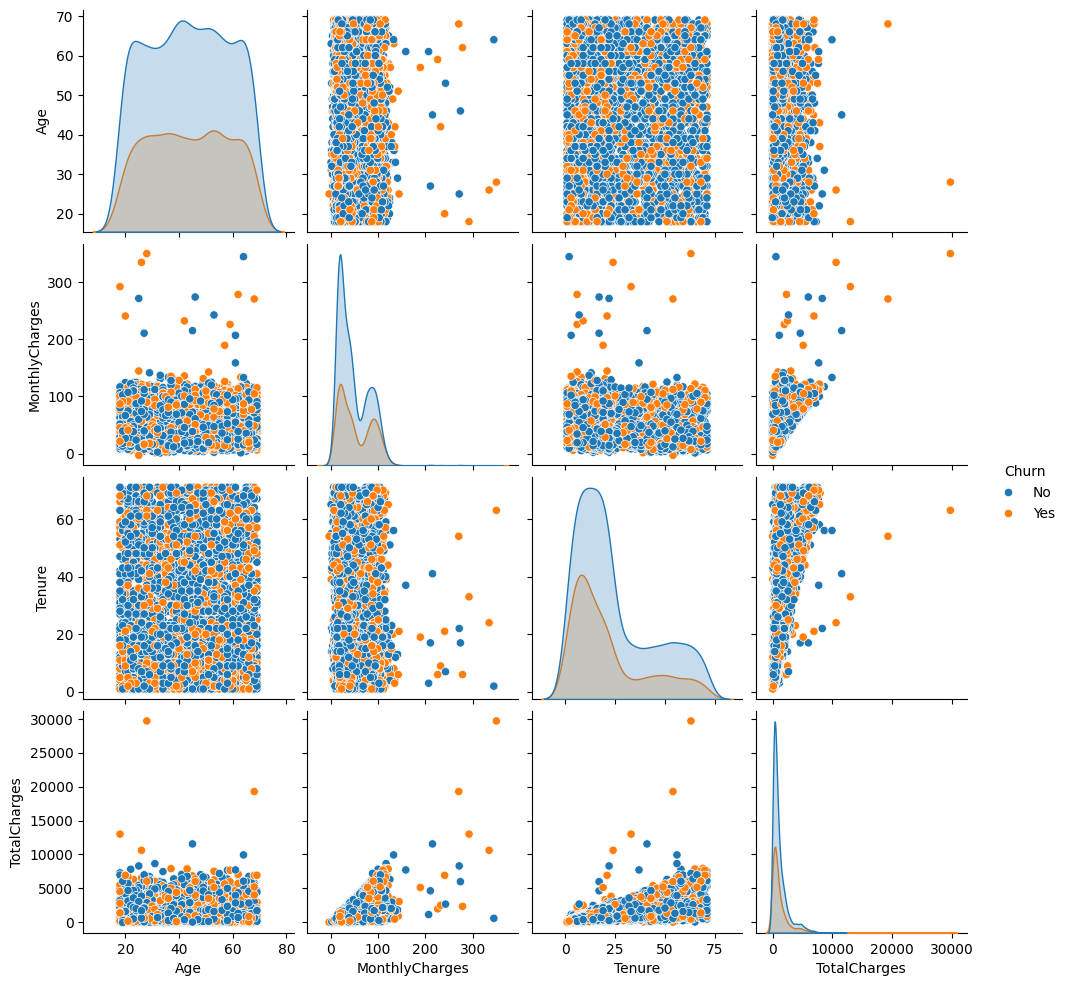

In [29]:
# Pairplot to visualize relationships between numerical features and churn
sns.pairplot(df, hue='Churn', vars=['Age', 'MonthlyCharges', 'Tenure', 'TotalCharges'])
plt.show()


In [30]:
#  3. Data Preprocessing:
# Handle missing values using appropriate techniques.
# Encodecategorical features into numerical format.
# Split the dataset into training, validation, and testing sets.
# Consider techniques to handle imbalanced data (if necessary).

In [31]:
df.isnull().sum()

CustomerID               0
Age                      0
Gender                   0
ContractType             0
InternetService          0
TechSupport              0
PaperlessBilling         0
MonthlyCharges           0
Tenure                   0
TotalCharges             0
PaymentMethod            0
Churn                    0
AverageMonthlyCharges    0
CustomerLifetimeValue    0
dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for binary categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 1, Female = 0
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])  # Yes = 1, No = 0
df['Churn'] = le.fit_transform(df['Churn'])  # Yes = 1, No = 0

# One-hot encoding for multi-class categorical features
df = pd.get_dummies(df, columns=['ContractType', 'InternetService', 'PaymentMethod'], drop_first=True)


In [33]:
df.head()

,CustomerID,Age,Gender,TechSupport,PaperlessBilling,MonthlyCharges,Tenure,TotalCharges,Churn,AverageMonthlyCharges,CustomerLifetimeValue,ContractType_One year,ContractType_Two year,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card,PaymentMethod_Debit card,PaymentMethod_Direct debit,PaymentMethod_Electronic check
0,1,56,1,No,0,100.682961,16,1574.666543,0,98.416659,2121.611374,True,False,True,False,False,False,True,False
1,2,69,0,No,0,100.747391,11,1023.870600,1,93.079145,1319.911177,False,False,True,False,True,False,False,False
2,3,46,0,Yes,1,54.050081,1,110.331266,0,110.331266,154.901818,False,False,False,False,False,True,False,False
3,4,32,1,Yes,1,30.661241,31,1035.495034,1,33.403066,1277.153518,False,True,False,False,False,False,False,False
4,5,60,1,No,1,100.699546,18,1825.154948,1,101.397497,2671.917754,True,False,True,False,False,False,True,False


In [34]:
from sklearn.model_selection import train_test_split

# Define feature matrix (X) and target variable (y)
X = df.drop(columns=['CustomerID', 'Churn'])  # Drop unnecessary columns
y = df['Churn']  # Target variable

# Split into training, validation, and testing sets (70% training, 15% validation, 15% testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 3500
Validation set size: 750
Testing set size: 750


In [35]:
X_train.shape

(3500, 17)

In [36]:
X_val.shape

(750, 17)

In [37]:
X_test.shape

(750, 17)

In [38]:
pip install imbalanced-learn



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
print(X_train.dtypes)


Age                                 int32
Gender                              int32
TechSupport                        object
PaperlessBilling                    int32
MonthlyCharges                    float64
Tenure                              int64
TotalCharges                      float64
AverageMonthlyCharges             float64
CustomerLifetimeValue             float64
ContractType_One year                bool
ContractType_Two year                bool
InternetService_Fiber optic          bool
InternetService_No                   bool
PaymentMethod_Credit card            bool
PaymentMethod_Debit card             bool
PaymentMethod_Direct debit           bool
PaymentMethod_Electronic check       bool
dtype: object


In [40]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    label_encoders[column] = le


In [41]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(y_train_smote.value_counts())


Churn
0    2364
1    2364
Name: count, dtype: int64


In [42]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'TechSupport', 'PaperlessBilling',
       'MonthlyCharges', 'Tenure', 'TotalCharges', 'Churn',
       'AverageMonthlyCharges', 'CustomerLifetimeValue',
       'ContractType_One year', 'ContractType_Two year',
       'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Credit card', 'PaymentMethod_Debit card',
       'PaymentMethod_Direct debit', 'PaymentMethod_Electronic check'],
      dtype='object')

In [43]:
# df['CustomerLifetimeValue'] = df['Tenure'] * df['MonthlyCharges']
# df['AverageMonthlyCharges'] = df['TotalCharges'] / (df['Tenure'] + 1)  # Add 1 to avoid division by zero
# df['HasTechSupport'] = df['TechSupport'].apply(lambda x: 1 if x == 'Yes' else 0)
# df['IsSeniorCitizen'] = df['Age'].apply(lambda x: 1 if x > 60 else 0)
# # 

In [44]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Middle-aged', 'Senior', 'Very Senior'])


In [45]:
# Create tenure groups
df['TenureGroup'] = pd.cut(df['Tenure'], bins=[0, 12, 36, 72], labels=['New', 'Medium', 'Long-term'])


In [46]:
# Adjust the column names based on the actual names in your dataset
df['PaymentMethodGroup'] = df['PaymentMethod_Electronic check'] + df['PaymentMethod_Direct debit'] + df['PaymentMethod_Credit card']

# Apply the grouping logic: 'Manual' for checks, 'Automated' for debit/credit
df['PaymentMethodGroup'] = df['PaymentMethodGroup'].apply(lambda x: 'Manual' if x > 0 else 'Automated')



In [47]:
# Interaction between MonthlyCharges and Tenure
df['MonthlyTenureInteraction'] = df['MonthlyCharges'] * df['Tenure']


In [48]:
# Log transformation for CustomerLifetimeValue
df['LogCustomerLifetimeValue'] = np.log1p(df['CustomerLifetimeValue'])


C:\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [49]:
# Interaction between ContractType and TechSupport
df['ContractTechSupport'] = df['ContractType_Two year'] * df['TechSupport']


In [50]:
df.head()

,CustomerID,Age,Gender,TechSupport,PaperlessBilling,MonthlyCharges,Tenure,TotalCharges,Churn,AverageMonthlyCharges,...,PaymentMethod_Credit card,PaymentMethod_Debit card,PaymentMethod_Direct debit,PaymentMethod_Electronic check,AgeGroup,TenureGroup,PaymentMethodGroup,MonthlyTenureInteraction,LogCustomerLifetimeValue,ContractTechSupport
0,1,56,1,No,0,100.682961,16,1574.666543,0,98.416659,...,False,False,True,False,Senior,Medium,Manual,1610.927376,7.660402,
1,2,69,0,No,0,100.747391,11,1023.870600,1,93.079145,...,True,False,False,False,Very Senior,New,Manual,1108.221302,7.186077,
2,3,46,0,Yes,1,54.050081,1,110.331266,0,110.331266,...,False,True,False,False,Senior,New,Automated,54.050081,5.049226,
3,4,32,1,Yes,1,30.661241,31,1035.495034,1,33.403066,...,False,False,False,False,Middle-aged,Medium,Automated,950.498480,7.153172,Yes
4,5,60,1,No,1,100.699546,18,1825.154948,1,101.397497,...,False,False,True,False,Senior,Medium,Manual,1812.591824,7.890926,


In [51]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'TechSupport', 'PaperlessBilling',
       'MonthlyCharges', 'Tenure', 'TotalCharges', 'Churn',
       'AverageMonthlyCharges', 'CustomerLifetimeValue',
       'ContractType_One year', 'ContractType_Two year',
       'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Credit card', 'PaymentMethod_Debit card',
       'PaymentMethod_Direct debit', 'PaymentMethod_Electronic check',
       'AgeGroup', 'TenureGroup', 'PaymentMethodGroup',
       'MonthlyTenureInteraction', 'LogCustomerLifetimeValue',
       'ContractTechSupport'],
      dtype='object')

In [52]:
# # Drop irrelevant columns and update X with new features
# X = df.drop(columns=['CustomerID', 'Churn', 'AverageMonthlyCharges', 'CustomerLifetimeValue'])

# # Optional: Check the new shape of X
# print("Updated feature set shape:", X.shape)


In [53]:
df.ContractTechSupport 

0          
1          
2          
3       Yes
4          
       ... 
4995       
4996     No
4997       
4998     No
4999    Yes
Name: ContractTechSupport, Length: 5000, dtype: object

In [54]:
# Convert 'TechSupport' and 'ContractType_Two year' to numeric
df['TechSupport'] = df['TechSupport'].replace({'Yes': 1, 'No': 0})  # Ensure TechSupport is numeric
df['ContractType_Two year'] = df['ContractType_Two year'].astype(int)  # ContractType_Two year should be 0 or 1


C:\Users\Admin\AppData\Local\Temp\ipykernel_13108\3964936497.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TechSupport'] = df['TechSupport'].replace({'Yes': 1, 'No': 0})  # Ensure TechSupport is numeric


In [55]:
# Create the 'ContractTechSupport' feature as an interaction
df['ContractTechSupport'] = df['ContractType_Two year'] * df['TechSupport']

# Verify the result
print(df['ContractTechSupport'].head())


0    0
1    0
2    0
3    1
4    0
Name: ContractTechSupport, dtype: int64


In [56]:
df['PaymentMethodGroup'] = df['PaymentMethodGroup'].map({'Manual': 1, 'Automated': 0})

In [57]:
print(df.dtypes)

CustomerID                           int64
Age                                  int32
Gender                               int32
TechSupport                          int64
PaperlessBilling                     int32
MonthlyCharges                     float64
Tenure                               int64
TotalCharges                       float64
Churn                                int32
AverageMonthlyCharges              float64
CustomerLifetimeValue              float64
ContractType_One year                 bool
ContractType_Two year                int32
InternetService_Fiber optic           bool
InternetService_No                    bool
PaymentMethod_Credit card             bool
PaymentMethod_Debit card              bool
PaymentMethod_Direct debit            bool
PaymentMethod_Electronic check        bool
AgeGroup                          category
TenureGroup                       category
PaymentMethodGroup                   int64
MonthlyTenureInteraction           float64
LogCustomer

In [58]:
# 1. Fill NaN values in PaymentMethodGroup (if any) and convert to int32
df['PaymentMethodGroup'] = df['PaymentMethodGroup'].fillna(0).astype('int32')

# 2. Convert category columns to integer codes
df['AgeGroup'] = df['AgeGroup'].cat.codes.astype('int32')
df['TenureGroup'] = df['TenureGroup'].cat.codes.astype('int32')

# 3. Convert boolean columns to int32
df['ContractType_One year'] = df['ContractType_One year'].astype('int32')
df['InternetService_Fiber optic'] = df['InternetService_Fiber optic'].astype('int32')
df['InternetService_No'] = df['InternetService_No'].astype('int32')
df['PaymentMethod_Credit card'] = df['PaymentMethod_Credit card'].astype('int32')
df['PaymentMethod_Debit card'] = df['PaymentMethod_Debit card'].astype('int32')
df['PaymentMethod_Direct debit'] = df['PaymentMethod_Direct debit'].astype('int32')
df['PaymentMethod_Electronic check'] = df['PaymentMethod_Electronic check'].astype('int32')

# Final check of data types
print(df.dtypes)


CustomerID                          int64
Age                                 int32
Gender                              int32
TechSupport                         int64
PaperlessBilling                    int32
MonthlyCharges                    float64
Tenure                              int64
TotalCharges                      float64
Churn                               int32
AverageMonthlyCharges             float64
CustomerLifetimeValue             float64
ContractType_One year               int32
ContractType_Two year               int32
InternetService_Fiber optic         int32
InternetService_No                  int32
PaymentMethod_Credit card           int32
PaymentMethod_Debit card            int32
PaymentMethod_Direct debit          int32
PaymentMethod_Electronic check      int32
AgeGroup                            int32
TenureGroup                         int32
PaymentMethodGroup                  int32
MonthlyTenureInteraction          float64
LogCustomerLifetimeValue          

In [59]:
# Check for missing values in the DataFrame
print(df.isnull().sum())


CustomerID                         0
Age                                0
Gender                             0
TechSupport                        0
PaperlessBilling                   0
MonthlyCharges                     0
Tenure                             0
TotalCharges                       0
Churn                              0
AverageMonthlyCharges              0
CustomerLifetimeValue              0
ContractType_One year              0
ContractType_Two year              0
InternetService_Fiber optic        0
InternetService_No                 0
PaymentMethod_Credit card          0
PaymentMethod_Debit card           0
PaymentMethod_Direct debit         0
PaymentMethod_Electronic check     0
AgeGroup                           0
TenureGroup                        0
PaymentMethodGroup                 0
MonthlyTenureInteraction           0
LogCustomerLifetimeValue          84
ContractTechSupport                0
dtype: int64


In [60]:
# Option 1: Impute missing values with the median of the column
df['LogCustomerLifetimeValue'].fillna(df['LogCustomerLifetimeValue'].median(), inplace=True)

# Option 2: Drop rows with missing values in 'LogCustomerLifetimeValue'
# df.dropna(subset=['LogCustomerLifetimeValue'], inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_13108\3424689400.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LogCustomerLifetimeValue'].fillna(df['LogCustomerLifetimeValue'].median(), inplace=True)


In [61]:
# Check for missing values in the DataFrame
print(df.isnull().sum())

CustomerID                        0
Age                               0
Gender                            0
TechSupport                       0
PaperlessBilling                  0
MonthlyCharges                    0
Tenure                            0
TotalCharges                      0
Churn                             0
AverageMonthlyCharges             0
CustomerLifetimeValue             0
ContractType_One year             0
ContractType_Two year             0
InternetService_Fiber optic       0
InternetService_No                0
PaymentMethod_Credit card         0
PaymentMethod_Debit card          0
PaymentMethod_Direct debit        0
PaymentMethod_Electronic check    0
AgeGroup                          0
TenureGroup                       0
PaymentMethodGroup                0
MonthlyTenureInteraction          0
LogCustomerLifetimeValue          0
ContractTechSupport               0
dtype: int64


In [62]:
# Splitting dataset into X (features) and y (target)
X = df.drop(columns=['Churn', 'CustomerID'])  # Drop the target and irrelevant columns
y = df['Churn']  # Target variable

# Check the shapes
print(X.shape, y.shape)


(5000, 23) (5000,)


In [63]:
from sklearn.model_selection import train_test_split

# Assume X is your feature matrix and y is your target variable (Churn)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (3500, 23)
Validation set shape: (750, 23)
Testing set shape: (750, 23)


In [64]:
print(X_train.dtypes)
print(X_val.dtypes)


Age                                 int32
Gender                              int32
TechSupport                         int64
PaperlessBilling                    int32
MonthlyCharges                    float64
Tenure                              int64
TotalCharges                      float64
AverageMonthlyCharges             float64
CustomerLifetimeValue             float64
ContractType_One year               int32
ContractType_Two year               int32
InternetService_Fiber optic         int32
InternetService_No                  int32
PaymentMethod_Credit card           int32
PaymentMethod_Debit card            int32
PaymentMethod_Direct debit          int32
PaymentMethod_Electronic check      int32
AgeGroup                            int32
TenureGroup                         int32
PaymentMethodGroup                  int32
MonthlyTenureInteraction          float64
LogCustomerLifetimeValue          float64
ContractTechSupport                 int64
dtype: object
Age                 

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_model.predict(X_val)


In [66]:
# Evaluate the model on the validation set
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Calculate AUC-ROC
y_val_pred_proba = rf_model.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_val_pred_proba)
print(f"\nAUC-ROC Score: {roc_auc}")


Confusion Matrix:
[[442  64]
 [204  40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.87      0.77       506
           1       0.38      0.16      0.23       244

    accuracy                           0.64       750
   macro avg       0.53      0.52      0.50       750
weighted avg       0.59      0.64      0.59       750


AUC-ROC Score: 0.5936548305578955


In [67]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and AUC score
print("Best Parameters: ", grid_search.best_params_)
print("Best AUC-ROC Score: ", grid_search.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best AUC-ROC Score:  0.6013764972301999


In [68]:
# Predict on the test set
y_test_pred = rf_model.predict(X_test)
y_test_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate on the test set
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# AUC-ROC Score on test set
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f"\nAUC-ROC Score on Test Set: {test_roc_auc}")


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.86      0.77       507
           1       0.41      0.19      0.26       243

    accuracy                           0.65       750
   macro avg       0.55      0.53      0.51       750
weighted avg       0.60      0.65      0.60       750


AUC-ROC Score on Test Set: 0.6457252782039106


In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, classification_report

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_scaled, y_train)

# Predictions
y_val_pred = gbc.predict(X_val_scaled)
y_val_pred_proba = gbc.predict_proba(X_val_scaled)[:, 1]

# Evaluation
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

# AUC-ROC
roc_auc = roc_auc_score(y_val, y_val_pred_proba)
print(f"AUC-ROC: {roc_auc}")


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.94      0.79       506
           1       0.41      0.08      0.14       244

    accuracy                           0.66       750
   macro avg       0.54      0.51      0.46       750
weighted avg       0.59      0.66      0.58       750

AUC-ROC: 0.6179088641223354


In [70]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb_model = XGBClassifier(random_state=42)

# Parameter grid for XGBoost
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, 
                                   n_iter=50, scoring='roc_auc', cv=3, n_jobs=-1, random_state=42)
random_search.fit(X_train_scaled, y_train)

print("Best Parameters: ", random_search.best_params_)
print("Best AUC-ROC Score: ", random_search.best_score_)


Best Parameters:  {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best AUC-ROC Score:  0.6128013986703476


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Example data preparation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize the model
rf_model = RandomForestClassifier()

# Fit the model with training data
rf_model.fit(X_train_scaled, y_train)

# Predict probabilities on the validation set
y_val_pred_proba = rf_model.predict_proba(X_val_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc}')


ROC AUC: 0.6132625475596658


In [73]:
from sklearn.ensemble import VotingClassifier

# Define individual models
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, random_state=42)
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model = XGBClassifier(subsample=1.0, n_estimators=100, max_depth=3, learning_rate=0.01, colsample_bytree=1.0, random_state=42)

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gbc', gbc_model),
    ('xgb', xgb_model)
], voting='soft')

# Train the Voting Classifier
voting_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_val_pred = voting_clf.predict(X_val_scaled)
y_val_pred_proba = voting_clf.predict_proba(X_val_scaled)[:, 1]

print("Voting Classifier Classification Report:")
print(classification_report(y_val, y_val_pred))

print(f"AUC-ROC for Voting Classifier: {roc_auc_score(y_val, y_val_pred_proba)}")


Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       674
           1       0.67      0.02      0.04       326

    accuracy                           0.68      1000
   macro avg       0.67      0.51      0.42      1000
weighted avg       0.67      0.68      0.55      1000

AUC-ROC for Voting Classifier: 0.6397025359086854


Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.68      0.85      0.76       674
           1       0.37      0.18      0.25       326

    accuracy                           0.63      1000
   macro avg       0.53      0.52      0.50      1000
weighted avg       0.58      0.63      0.59      1000

AUC-ROC Score for RandomForestClassifier: 0.6127710218273834

Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.68      0.98      0.81       674
           1       0.60      0.06      0.12       326

    accuracy                           0.68      1000
   macro avg       0.64      0.52      0.46      1000
weighted avg       0.66      0.68      0.58      1000

AUC-ROC Score for GradientBoostingClassifier: 0.6444380222460906

Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0      

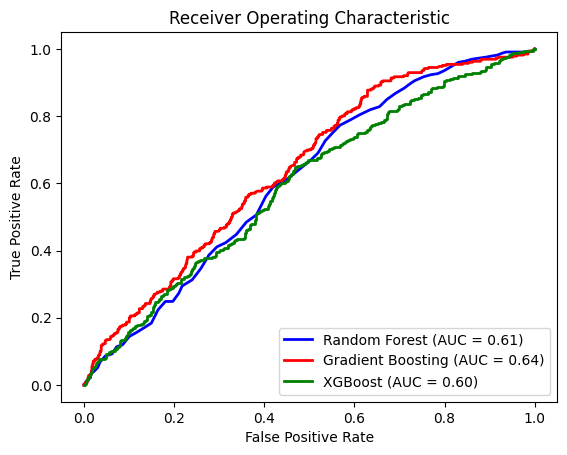

Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.90      0.78       674
           1       0.43      0.16      0.23       326

    accuracy                           0.66      1000
   macro avg       0.56      0.53      0.50      1000
weighted avg       0.60      0.66      0.60      1000

AUC-ROC for Voting Classifier: 0.6258487921210246


In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
gbc_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Train models
rf_model.fit(X_train_scaled, y_train)
gbc_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

# Predictions and probabilities
def evaluate_model(model, X_val, y_val):
    y_val_pred = model.predict(X_val)
    y_val_pred_proba = model.predict_proba(X_val)[:, 1]
    
    print(f"Classification Report for {model.__class__.__name__}:")
    print(classification_report(y_val, y_val_pred))
    
    roc_auc = roc_auc_score(y_val, y_val_pred_proba)
    print(f"AUC-ROC Score for {model.__class__.__name__}: {roc_auc}\n")
    
    return roc_auc, y_val_pred_proba

# Evaluate models
rf_auc, rf_val_proba = evaluate_model(rf_model, X_val_scaled, y_val)
gbc_auc, gbc_val_proba = evaluate_model(gbc_model, X_val_scaled, y_val)
xgb_auc, xgb_val_proba = evaluate_model(xgb_model, X_val_scaled, y_val)

# Plot ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_val, rf_val_proba)
fpr_gbc, tpr_gbc, _ = roc_curve(y_val, gbc_val_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, xgb_val_proba)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(fpr_gbc, tpr_gbc, color='red', lw=2, label=f'Gradient Boosting (AUC = {gbc_auc:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gbc', gbc_model),
    ('xgb', xgb_model)
], voting='soft')

voting_clf.fit(X_train_scaled, y_train)
y_val_voting_pred = voting_clf.predict(X_val_scaled)
y_val_voting_proba = voting_clf.predict_proba(X_val_scaled)[:, 1]

print("Voting Classifier Classification Report:")
print(classification_report(y_val, y_val_voting_pred))

voting_auc = roc_auc_score(y_val, y_val_voting_proba)
print(f"AUC-ROC for Voting Classifier: {voting_auc}")

In [78]:
# Using joblib to load the model
loaded_model = joblib.load('randomforest_model.pkl')

# OR using pickle to load the model
with open('randomforest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions
y_pred = loaded_model.predict(X_test)


C:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [79]:
import pickle

# Save the trained RandomForest model
with open('randomforest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("RandomForest model saved successfully!")


RandomForest model saved successfully!


In [82]:
# Using joblib to load the model
loaded_model = joblib.load('randomforest_model.pkl')

# OR using pickle to load the model
with open('randomforest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions
y_pred = loaded_model.predict(X_test)


C:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
